#### Importing Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#### Importing Dataset


In [3]:
data = pd.read_csv("Data.csv")
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


#### Analyzing Dataset


##### `.info()`


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


##### `.value_counts()`


In [5]:
# To be used in case of categorical columns

##### `.describe()`


In [6]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


##### `.corr()`


In [7]:
corr_matrix = data.corr()
corr_matrix["PE"].sort_values(ascending=False)

PE    1.000000
AP    0.518429
RH    0.389794
V    -0.869780
AT   -0.948128
Name: PE, dtype: float64

##### `.hist()`


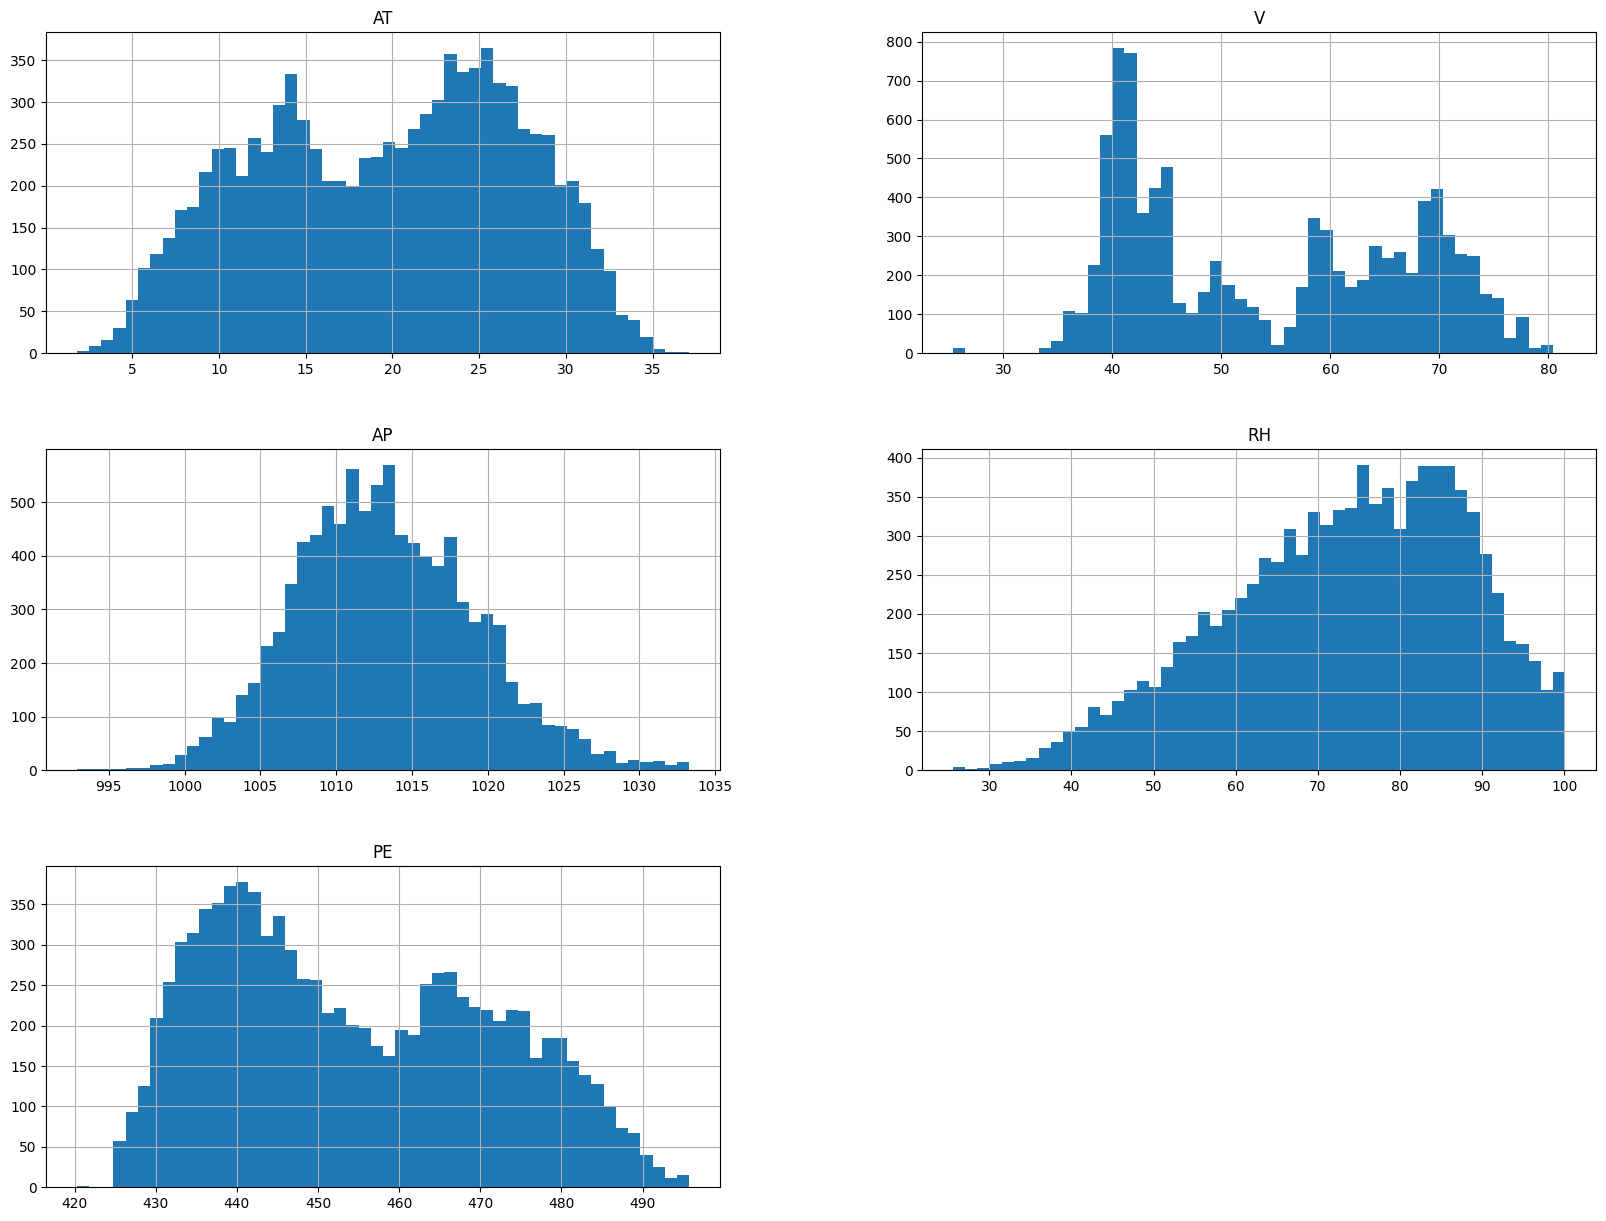

In [8]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

##### `scatter_matrix()`


array([[<Axes: xlabel='AP', ylabel='AP'>,
        <Axes: xlabel='RH', ylabel='AP'>,
        <Axes: xlabel='AT', ylabel='AP'>,
        <Axes: xlabel='V', ylabel='AP'>,
        <Axes: xlabel='PE', ylabel='AP'>],
       [<Axes: xlabel='AP', ylabel='RH'>,
        <Axes: xlabel='RH', ylabel='RH'>,
        <Axes: xlabel='AT', ylabel='RH'>,
        <Axes: xlabel='V', ylabel='RH'>,
        <Axes: xlabel='PE', ylabel='RH'>],
       [<Axes: xlabel='AP', ylabel='AT'>,
        <Axes: xlabel='RH', ylabel='AT'>,
        <Axes: xlabel='AT', ylabel='AT'>,
        <Axes: xlabel='V', ylabel='AT'>,
        <Axes: xlabel='PE', ylabel='AT'>],
       [<Axes: xlabel='AP', ylabel='V'>, <Axes: xlabel='RH', ylabel='V'>,
        <Axes: xlabel='AT', ylabel='V'>, <Axes: xlabel='V', ylabel='V'>,
        <Axes: xlabel='PE', ylabel='V'>],
       [<Axes: xlabel='AP', ylabel='PE'>,
        <Axes: xlabel='RH', ylabel='PE'>,
        <Axes: xlabel='AT', ylabel='PE'>,
        <Axes: xlabel='V', ylabel='PE'>,
        <Axes:

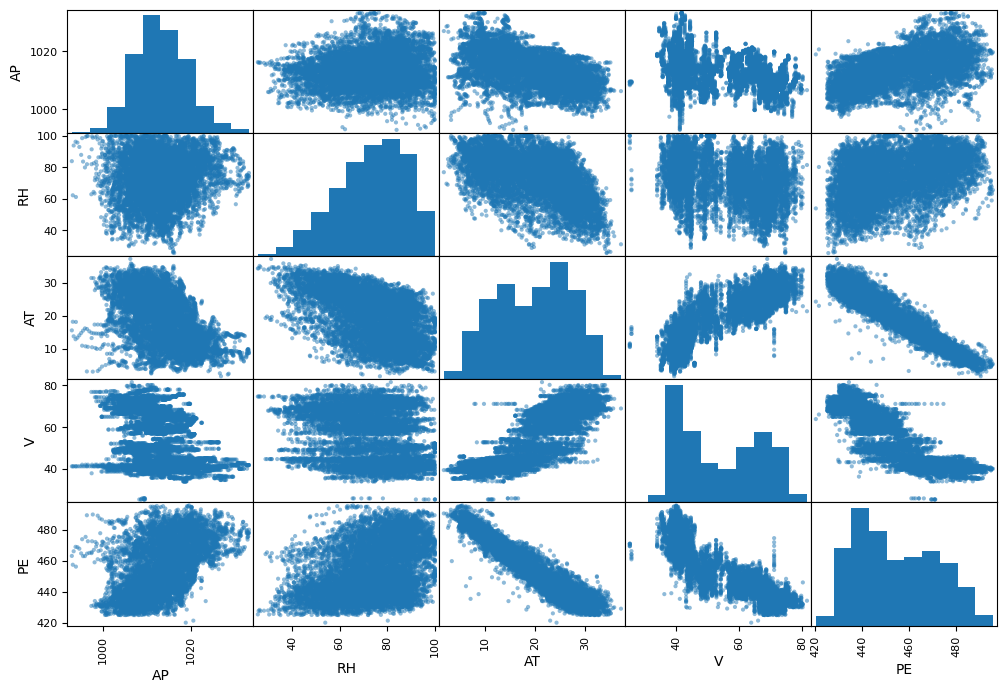

In [9]:
attributes = ["AP", "RH", "AT", "V", "PE"]
scatter_matrix(data[attributes], figsize=(12, 8))

<Axes: xlabel='AT', ylabel='PE'>

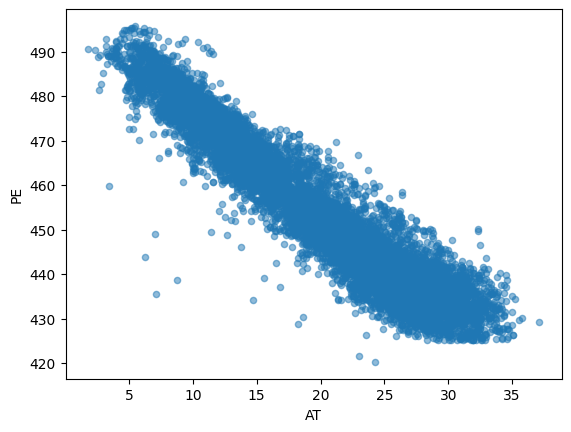

In [10]:
data.plot(kind="scatter", x="AT", y="PE", alpha=0.5)

##### `sns.heatmap()`


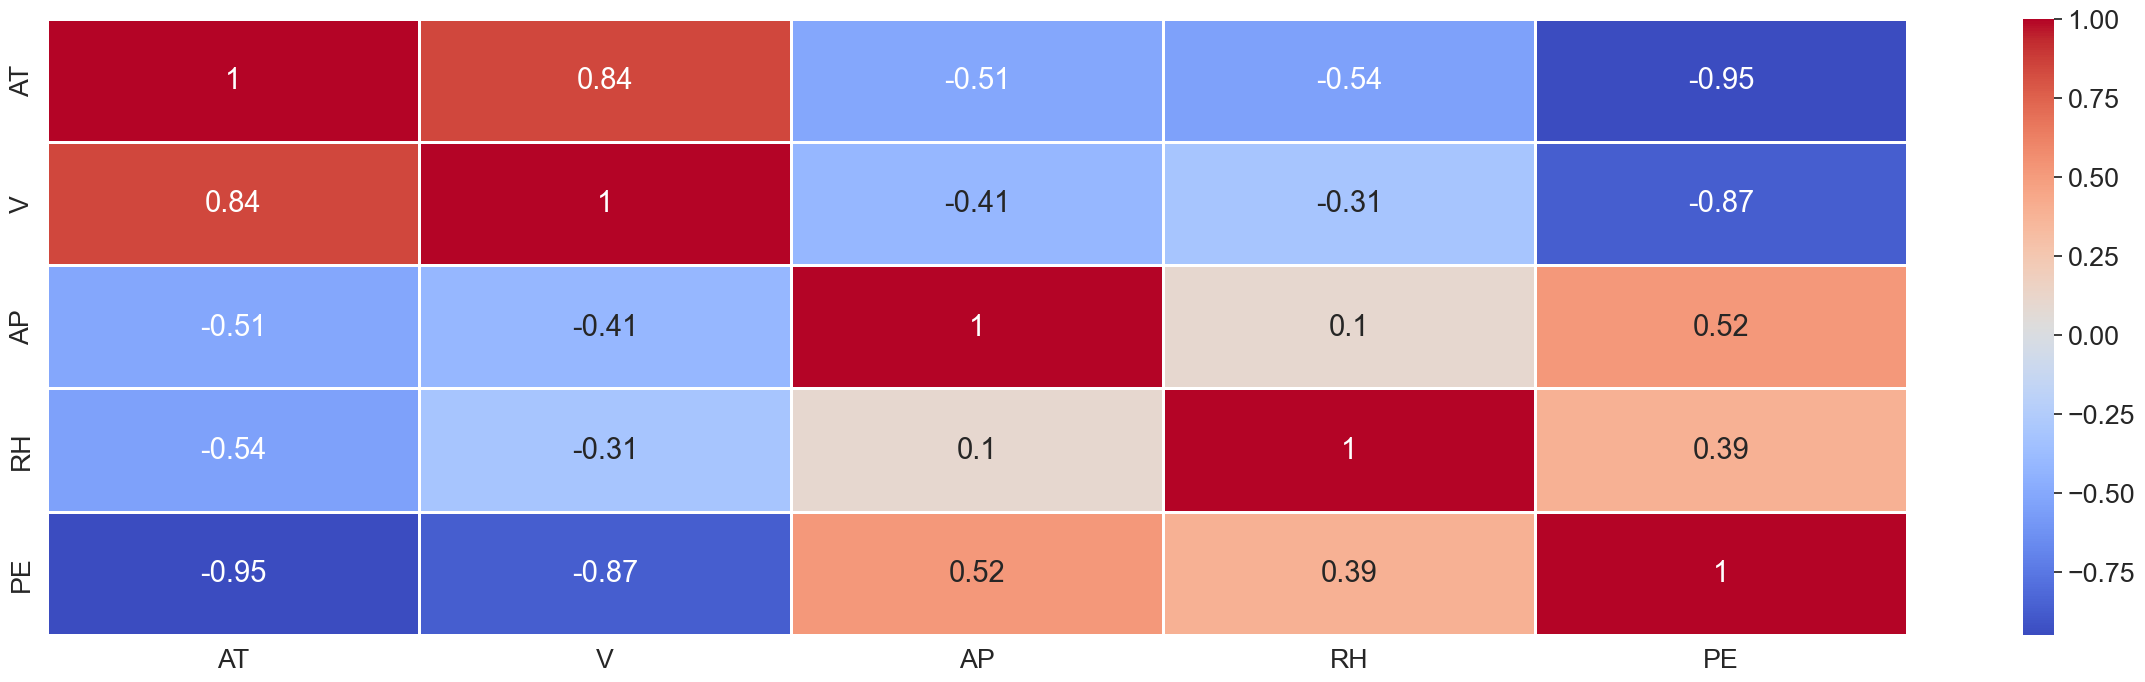

In [11]:
plt.figure(figsize=(30, 8))
sns.set(font_scale=1.75)
sns.heatmap(data.corr(), cmap="coolwarm", annot=True, linewidth=2)
plt.show()

#### Dividing Dataset into Dependent and Independent Variables


In [12]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

In [13]:
print(X.ndim)
print(Y.ndim)

2
1


#### Creating Training and Test sets


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25, random_state=0
)

#### Training Random Forest Regression model on Training set


In [15]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

#### Predicting the Test set results


In [16]:
Y_pred = regressor.predict(X_test)

#### Creating Dataframe for comparison


In [17]:
np.set_printoptions(precision=2)
pred = Y_pred.reshape(len(Y_pred), 1)
test = Y_test.reshape(len(Y_test), 1)
diff = abs(pred - test)
compare_arr = np.concatenate((pred, test, diff), 1)
compare_df = pd.DataFrame(compare_arr, columns=["pred", "test", "diff"])
compare_df.sort_values(by="diff", ascending=False)

,pred,test,diff
1710,463.234,434.12,29.114
678,451.020,430.38,20.640
2278,460.410,442.48,17.930
2108,488.528,472.66,15.868
1626,475.419,459.69,15.729
...,...,...,...
748,479.488,479.48,0.008
1948,458.795,458.80,0.005
1370,446.224,446.22,0.004
2143,441.228,441.23,0.002


#### Evaluating Model Performance


In [18]:
r2_score(Y_test, Y_pred)

0.960853142550123

In [19]:
mean_squared_error(Y_test, Y_pred)

11.481131918060207